### **Outlier Detection and Removal using Z-Score and Standard Deviation**

* Outlier detection is a crucial step in data cleaning and pre-processing.

* In this notebook, we'll explore two related methods for identifying and removing outliers: the **3-standard deviation rule** and the **Z-score method**. 

* Both are based on the principle of a normal distribution, where data points that are too far from the mean are considered outliers. 

* We will use a `hourse_prices.csv` dataset of Indian house prices, with prices represented in Lakhs (INR).

### Step 1: Import Libraries and Load Dataset

* We'll import the necessary libraries, including `pandas` for data manipulation, `numpy` for numerical operations, `matplotlib` and `seaborn` for plotting, and `scipy.stats` for statistical functions. 

* We'll then load our dataset and get a first look at the data.

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [6]:
# Load the dataset
df = pd.read_csv('house_prices.csv')
df.head()


,square_footage,price_lakhs
0,1998,98
1,1744,122
2,2059,40
3,2409,89
4,1706,58


In [8]:
# Display basic statistics of the dataset
df.describe()

,square_footage,price_lakhs
count,504.000000,504.000000
mean,1812.924603,76.111111
std,482.815297,27.797613
min,503.000000,7.000000
25%,1518.250000,59.750000
50%,1805.000000,75.000000
75%,2058.250000,91.000000
max,8000.000000,300.000000


### Step 2: Visualize the Data with a Bell Curve

* To understand if our data follows a normal distribution, we can plot a histogram and overlay a bell curve. 

* This visualization will help us see where most data points are clustered and where the outliers are located in the tails of the distribution.

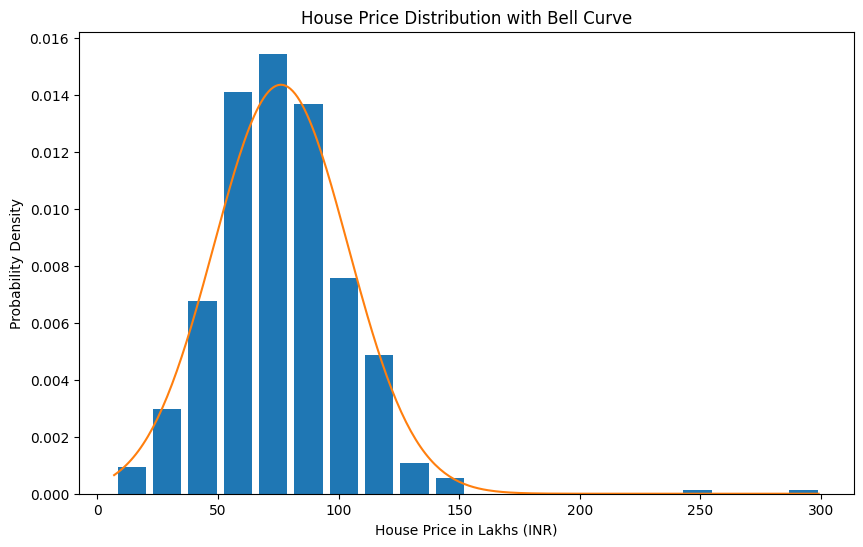

In [9]:
# Set plot size
matplotlib.rcParams['figure.figsize'] = (10,6)

# Plot histogram of house prices with a bell curve overlay
plt.hist(df['price_lakhs'], bins=20, rwidth=0.8, density=True)
plt.xlabel('House Price in Lakhs (INR)')
plt.ylabel('Probability Density')

# Overlay a bell curve
rng = np.arange(df.price_lakhs.min(), df.price_lakhs.max(), 1)
plt.plot(rng, norm.pdf(rng, df.price_lakhs.mean(), df.price_lakhs.std()))
plt.title('House Price Distribution with Bell Curve')
plt.show()

### Step 3: Outlier Detection and Removal with 3-Standard Deviation Rule

* The 3-standard deviation rule states that roughly 99.7% of data points in a normal distribution lie within three standard deviations of the mean. 

* We can use this to define an upper and lower limit for our data, and any values outside this range are considered outliers.

#### **The Empirical Rule (68-95-99.7)**

* **1-Standard Deviation Rule**: Approximately **68%** of the data points in a normal distribution lie within one standard deviation ($ \sigma $) of the mean ($ \mu $). This means the range from ($ \mu - \sigma $) to ($ \mu + \sigma $) contains roughly two-thirds of the data.

* **2-Standard Deviation Rule**: Approximately **95%** of the data points in a normal distribution lie within two standard deviations ($ 2\sigma $) of the mean ($ \mu $). This range is from ($ \mu - 2\sigma $) to ($ \mu + 2\sigma $).

* **3-Standard Deviation Rule**: Approximately **99.7%** of the data points in a normal distribution lie within three standard deviations ($ 3\sigma $) of the mean ($ \mu $). This range, from ($ \mu - 3\sigma $) to ($ \mu + 3\sigma $), is often used as a threshold to identify outliers.

![Standard_Deviation](std_dev.png)

[Image Source](https://articles.outlier.org/a-step-by-step-guide-on-how-to-calculate-standard-deviation)


In [10]:
# Calculate mean and standard deviation
mean_price = df.price_lakhs.mean()
std_price = df.price_lakhs.std()

print(f"Mean Price: {mean_price:.2f} Lakhs")
print(f"Standard Deviation: {std_price:.2f} Lakhs")


Mean Price: 76.11 Lakhs
Standard Deviation: 27.80 Lakhs


In [11]:
# Calculate upper and lower limits
upper_limit = mean_price + 3 * std_price
lower_limit = mean_price - 3 * std_price

print(f"\nUpper Limit (3-std dev): {upper_limit:.2f} Lakhs")
print(f"Lower Limit (3-std dev): {lower_limit:.2f} Lakhs")


Upper Limit (3-std dev): 159.50 Lakhs
Lower Limit (3-std dev): -7.28 Lakhs


In [12]:
# Display the outliers
outliers_std = df[(df.price_lakhs < lower_limit) | (df.price_lakhs > upper_limit)]
print("\n--- Outliers identified by 3-standard deviation rule ---")
print(outliers_std)


--- Outliers identified by 3-standard deviation rule ---
     square_footage  price_lakhs
500             600          250
503            2500          300


In [13]:
# Remove outliers from the dataset
df_cleaned_std = df[(df.price_lakhs >= lower_limit) & (df.price_lakhs <= upper_limit)]
print(f"\nOriginal dataset size: {df.shape[0]} records")
print(f"Cleaned dataset size: {df_cleaned_std.shape[0]} records")


Original dataset size: 504 records
Cleaned dataset size: 502 records


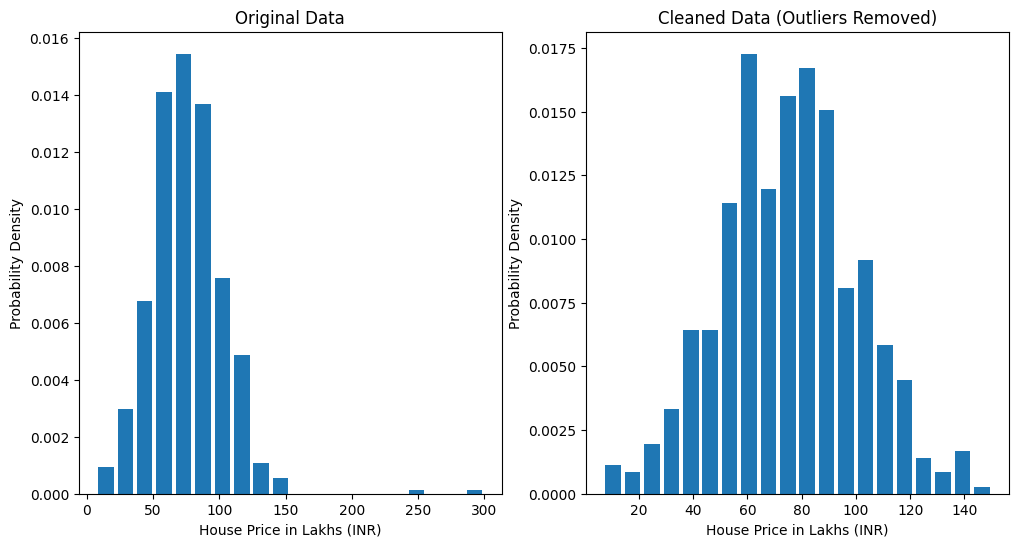

In [ ]:
# Visualize original vs cleaned data
# Set plot size
plt.figure(figsize=(12,6))

# Original Data
plt.subplot(1,2,1)
plt.hist(df['price_lakhs'], bins=20, rwidth=0.8, density=True)
plt.title('Original Data')
plt.xlabel('House Price in Lakhs (INR)')
plt.ylabel('Probability Density')

# Cleaned Data
plt.subplot(1,2,2)
plt.hist(df_cleaned_std['price_lakhs'], bins=20, rwidth=0.8, density=True)
plt.title('Cleaned Data (Outliers Removed)')
plt.xlabel('House Price in Lakhs (INR)')
plt.ylabel('Probability Density')
plt.show()

### Step 4: Outlier Detection and Removal with Z-Score

* An alternative, but mathematically equivalent, method is to use the Z-score. 

* A Z-score measures how many standard deviations a data point is from the mean. 

* A common practice is to consider any data point with a Z-score greater than 3 or less than -3 as an outlier.

##### **Z-score Method**

For reference, the Z-score formula is a way to measure how many standard deviations a data point is from the mean. It is defined as:

$Z = (X - \mu) / \sigma$

![Z-score](Z-score.png)

In [15]:
# Calculate Z-score for the price column
df['zscore'] = (df.price_lakhs - df.price_lakhs.mean()) / df.price_lakhs.std()

print("--- First 5 rows with Z-score ---")
df.head()


--- First 5 rows with Z-score ---


,square_footage,price_lakhs,zscore
0,1998,98,0.787438
1,1744,122,1.650821
2,2059,40,-1.299072
3,2409,89,0.463669
4,1706,58,-0.651535


In [16]:
# Display outliers using Z-score
outliers_zscore = df[(df['zscore'] < -3) | (df['zscore'] > 3)]
print("\n--- Outliers identified by Z-score method ---")

outliers_zscore


--- Outliers identified by Z-score method ---


,square_footage,price_lakhs,zscore
500,600,250,6.255533
503,2500,300,8.054249


* We will create a new DataFrame with the outliers removed and compare its shape to the original DataFrame. 

* Since the 3-standard deviation and Z-score methods are equivalent, the number of removed data points should be the same.

In [17]:
# Remove outliers using the Z-score method
df_no_outlier = df[(df['zscore'] > -3) & (df['zscore'] < 3)]

print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", df_no_outlier.shape)

Original DataFrame shape: (504, 3)
Cleaned DataFrame shape: (502, 3)


In [18]:
# Display the first few rows of the cleaned DataFrame
df_no_outlier.head()

,square_footage,price_lakhs,zscore
0,1998,98,0.787438
1,1744,122,1.650821
2,2059,40,-1.299072
3,2409,89,0.463669
4,1706,58,-0.651535


### Summary

* In this notebook, we have successfully performed outlier detection on a house prices dataset using two common methods: the `3-standard deviation` rule and the `Z-score` method. 

* We visualized the data to confirm its distribution, identified the outliers using both methods (which yielded the same results), and created a cleaned dataset. 

* This process is essential for ensuring that our data is robust and suitable for building accurate machine learning models.

---

#### **Exercise: Outlier Detection and Removal using Quantile, Standard Deviation and Z-score Methods**

#### Problem Statement

* Use Banglore House Prices (`bhp.csv`) dataset which contains extreme outliers in the `price_per_sqft` column, which can negatively affect machine learning model accuracy. 

* Your task is to clean this data by removing these outliers.

* Tasks to be Performed:

  * Detect and Remove outliers using the Percentile Method with a [0.001, 0.999] range.

  * On the cleaned data, detect and remove further outliers using the Standard Deviation Method with a threshold of 4 standard deviations.

  * Plot a histogram with a bell curve on the final dataset to visualize the cleaned distribution.

  * Explain how the Z-Score Method is equivalent to the Standard Deviation Method for this task.

  ---

* Donwload Dataset:  [bhp.csv](https://raw.githubusercontent.com/prakash-ukhalkar/ML/refs/heads/main/07_Feature_Engineering_ML/01_Exercise_Feature_Engineering_ML/bhp.csv)
* Solution : [Exercise - Outlier Detection and Removal using Quantile, Standard Deviation and Z-score Methods](https://github.com/prakash-ukhalkar/ML/blob/main/07_Feature_Engineering_ML/01_Exercise_Feature_Engineering_ML/02_Exercise_Outlier_Detection_Removal_Std-Dev_and_Z-score_ML.ipynb)

---